# Overview
...

# Loading enrichment results

In [1]:
# loading libraries
import glob, pandas as pd, seaborn as sns

In [2]:
# loading table with enriched GO terms

In [3]:
go_slims_enriched = pd.read_csv('../results/go_enrichment_analyses/go_terms_classified_GOSlims_species.tsv', 
                                sep = '\t')

In [4]:
go_slims_enriched.head()

,go_slim,V1,p_value,species,TERM.x,ONTOLOGY.x,TERM.y,ONTOLOGY.y
0,GO:0006790,GO:0051923,0.00014,clonorchis_sinensis,sulfation,BP,sulfur compound metabolic process,BP
1,GO:0007165,GO:0008314,0.00014,clonorchis_sinensis,gurken signaling pathway,BP,signal transduction,BP
2,GO:0048646,GO:0001744,0.00014,clonorchis_sinensis,optic lobe placode formation,BP,anatomical structure formation involved in mor...,BP
3,GO:0006629,GO:0008210,0.00023,clonorchis_sinensis,estrogen metabolic process,BP,lipid metabolic process,BP
4,GO:0048856,GO:0001748,0.00044,clonorchis_sinensis,optic lobe placode development,BP,anatomical structure development,BP


In [5]:
# performing some data warngling in order to perform plotting

In [6]:
import numpy as np

In [7]:
# creating auxiliary functions
def adjusting_cells(cell):
    try:
        return float(cell)
    except:
        return 1e-30

def converting_to_binary(cell):
    if cell > 0:
        return 1
    else:
        return 0

In [8]:
go_slims_enriched_toplot = (go_slims_enriched[['go_slim', 'species', 'p_value', 'TERM.x', 'ONTOLOGY.x']].
    assign(p_value = lambda df: [adjusting_cells(x) for x in df['p_value'].to_list()]).
    pivot_table(index = ['ONTOLOGY.x', 'species'],
                columns='go_slim', values = 'p_value', aggfunc=np.sum, fill_value=0).
    applymap(converting_to_binary))

In [9]:
go_slims_enriched_toplot.head()

go_slim                                 GO:0000003  GO:0000228  GO:0000278  \
ONTOLOGY.x species                                                           
BP         clonorchis_sinensis                   0           0           1   
           diphyllobothrium_latum                0           0           0   
           echinococcus_canadensis               0           0           0   
           echinococcus_granulosus               0           0           0   
           echinococcus_multilocularis           0           0           0   

go_slim                                 GO:0000902  GO:0000988  GO:0002376  \
ONTOLOGY.x species                                                           
BP         clonorchis_sinensis                   1           0           0   
           diphyllobothrium_latum                1           0           1   
           echinococcus_canadensis               0           0           0   
           echinococcus_granulosus               0           0           1   
           echinococcus_multilocularis           0           0           1   

go_slim                                 GO:0003013  GO:0003674  GO:0003677  \
ONTOLOGY.x species                                                           
BP         clonorchis_sinensis                   1           0           0   
           diphyllobothrium_latum                0           0           0   
           echinococcus_canadensis               0           0           0   
           echinococcus_granulosus               1           0           0   
           echinococcus_multilocularis           1           0           0   

go_slim                                 GO:0003700  ...  GO:0050877  \
ONTOLOGY.x species                                  ...               
BP         clonorchis_sinensis                   0  ...           0   
           diphyllobothrium_latum                0  ...           1   
           echinococcus_canadensis               0  ...           0   
           echinococcus_granulosus               0  ...           1   
           echinococcus_multilocularis           0  ...           0   

go_slim                                 GO:0051082  GO:0051186  GO:0051276  \
ONTOLOGY.x species                                                           
BP         clonorchis_sinensis                   0           0           0   
           diphyllobothrium_latum                0           0           0   
           echinococcus_canadensis               0           0           1   
           echinococcus_granulosus               0           0           1   
           echinococcus_multilocularis           0           0           1   

go_slim                                 GO:0051301  GO:0051604  GO:0055085  \
ONTOLOGY.x species                                                           
BP         clonorchis_sinensis                   0           0           1   
           diphyllobothrium_latum                0           0           1   
           echinococcus_canadensis               0           0           0   
           echinococcus_granulosus               0           0           1   
           echinococcus_multilocularis           0           0           0   

go_slim                                 GO:0061024  GO:0065003  GO:0071554  
ONTOLOGY.x species                                                          
BP         clonorchis_sinensis                   0           0           0  
           diphyllobothrium_latum                0           1           0  
           echinococcus_canadensis               0           0           0  
           echinococcus_granulosus               1           0           0  
           echinococcus_multilocularis           0           1           0  

[5 rows x 134 columns]

In [10]:
# make a transposition of the table in order to plot

In [11]:
#go_slims_enriched_toplot = go_slims_enriched_toplot.transpose()

# Performing grouping by semantic similarity

In [12]:
#go_slims_enriched_toplot = go_slims_enriched_toplot.transpose().reset_index().query("`ONTOLOGY.x` == 'BP'").drop(['ONTOLOGY.x'], axis = 1).set_index('species').transpose()

In [13]:
go_slims_enriched_toplot = go_slims_enriched_toplot.reset_index()

In [14]:
from goatools.obo_parser import GODag
from goatools.base import get_godag
import numpy as np
import itertools 
import pandas as pd
from goatools.semsim.termwise.wang import SsWang
from goatools.base import get_godag
import seaborn as sns
import scipy.cluster.hierarchy as hc

godag = get_godag("../data/go-basic.obo", optional_attrs={'relationship'})
obodag = GODag('../data/go-basic.obo')

  EXISTS: ../data/go-basic.obo
../data/go-basic.obo: fmt(1.2) rel(2022-07-01) 47,008 Terms; optional_attrs(relationship)
../data/go-basic.obo: fmt(1.2) rel(2022-07-01) 47,008 Terms


In [15]:
# creating dictionary of color palettes

In [16]:
colorp_dict = {'BP': sns.color_palette("light:green", as_cmap=True),
               'MF': sns.color_palette("light:purple", as_cmap=True), 
               'CC': sns.color_palette("light:skyblue", as_cmap=True)}

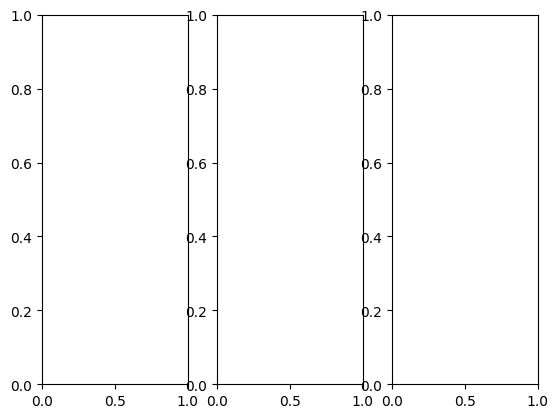

In [19]:
from matplotlib import pyplot as plt
import matplotlib.gridspec

fig, axes = plt.subplots(1, 3)
#fig.suptitle('1 row x 3 columns axes with no data')


In [20]:
# creating axis dictionary
axis_dict = {'BP': axes[0],
             'MF': axes[1], 
             'CC': axes[2]}

In [21]:
# creating dictionary for GO2GO-Description

In [22]:
go_slims_enriched.head()

,go_slim,V1,p_value,species,TERM.x,ONTOLOGY.x,TERM.y,ONTOLOGY.y
0,GO:0006790,GO:0051923,0.00014,clonorchis_sinensis,sulfation,BP,sulfur compound metabolic process,BP
1,GO:0007165,GO:0008314,0.00014,clonorchis_sinensis,gurken signaling pathway,BP,signal transduction,BP
2,GO:0048646,GO:0001744,0.00014,clonorchis_sinensis,optic lobe placode formation,BP,anatomical structure formation involved in mor...,BP
3,GO:0006629,GO:0008210,0.00023,clonorchis_sinensis,estrogen metabolic process,BP,lipid metabolic process,BP
4,GO:0048856,GO:0001748,0.00044,clonorchis_sinensis,optic lobe placode development,BP,anatomical structure development,BP


In [23]:
GO2GOdescript_dict = {row['go_slim']: row['go_slim'] + '-' + row['TERM.x'] for index,row in go_slims_enriched[['go_slim','TERM.x']].iterrows()}

In [24]:
# defining auxiliary function
def plotting_clustered_heatmap(go_slims_enriched_toplot):
    # getting ontology and arranging to plot
    ontology = list(set(go_slims_enriched_toplot['ONTOLOGY.x'].to_list()))[0]
    go_slims_enriched_toplot = go_slims_enriched_toplot.drop(['ONTOLOGY.x'], axis = 1).set_index('species').transpose()
    cmap_palette = colorp_dict[ontology]
    # getting rid of rows with full zero
    go_slims_enriched_toplot = go_slims_enriched_toplot.loc[~(go_slims_enriched_toplot==0).all(axis=1)]
    # getting axis to use
    axiss = axis_dict[ontology]
    # calculo clustering para los terminos involucrados
    goids = [go for go in go_slims_enriched_toplot.index.to_list() if go in list(godag.keys())]
    relationships = {'part_of'}
    #
    # goids: researcher-provided GO terms
    wang_r1 = SsWang(goids, godag, relationships)
    #
    relationship2weight = {
        'is_a': 0.9,
        'part_of': 0.1
    }
    wang_r1 = SsWang(goids, godag, relationships, relationship2weight)
    # las distancias usadas son 1-indice de similitud semantica de Wang
    distancias = []
    for goid_a in goids:
        distancias.append([1-wang_r1.get_sim(goid_a, goid_b) for goid_b in goids])
    array_distancias = np.array(distancias)
    #
    linkage = hc.linkage(array_distancias, method = 'ward')
    # correct index names and plot
    go_slims_enriched_toplot = go_slims_enriched_toplot.reset_index().assign(go_slim = lambda df: [GO2GOdescript_dict[x] for x in df['go_slim'].to_list()]).set_index('go_slim')
    g = sns.clustermap(go_slims_enriched_toplot, 
                   yticklabels = 1, xticklabels = 1, cmap = cmap_palette, vmin = 0, vmax = 1, row_linkage = linkage,
                   method = 'ward', col_cluster = False, figsize=(8*2,24), linewidths=0.5, linecolor='white')
    return g

In [25]:
#ontology = list(set(go_slims_enriched_toplot['ONTOLOGY.x'].to_list()))[0]
#go_slims_enriched_toplot = go_slims_enriched_toplot.drop(['ONTOLOGY.x'], axis = 1).set_index('species').transpose()
#cmap_palette = colorp_dict[ontology]

In [26]:
#go_slims_enriched_toplot.reset_index().assign(go_slim = lambda df: [GO2GOdescript_dict[x] for x in df['go_slim'].to_list()]).set_index('go_slim')

In [27]:
#g = plotting_clustered_heatmap(go_slims_enriched_toplot.query("`ONTOLOGY.x` == 'BP'"))

In [28]:
#go_slims_enriched_toplot = go_slims_enriched_toplot.drop(['ONTOLOGY.x'], axis = 1).set_index('species').transpose()


In [29]:
#go_slims_enriched_toplot.loc[~(go_slims_enriched_toplot==0).all(axis=1)]

In [30]:
len(set((go_slims_enriched['go_slim'])))

134

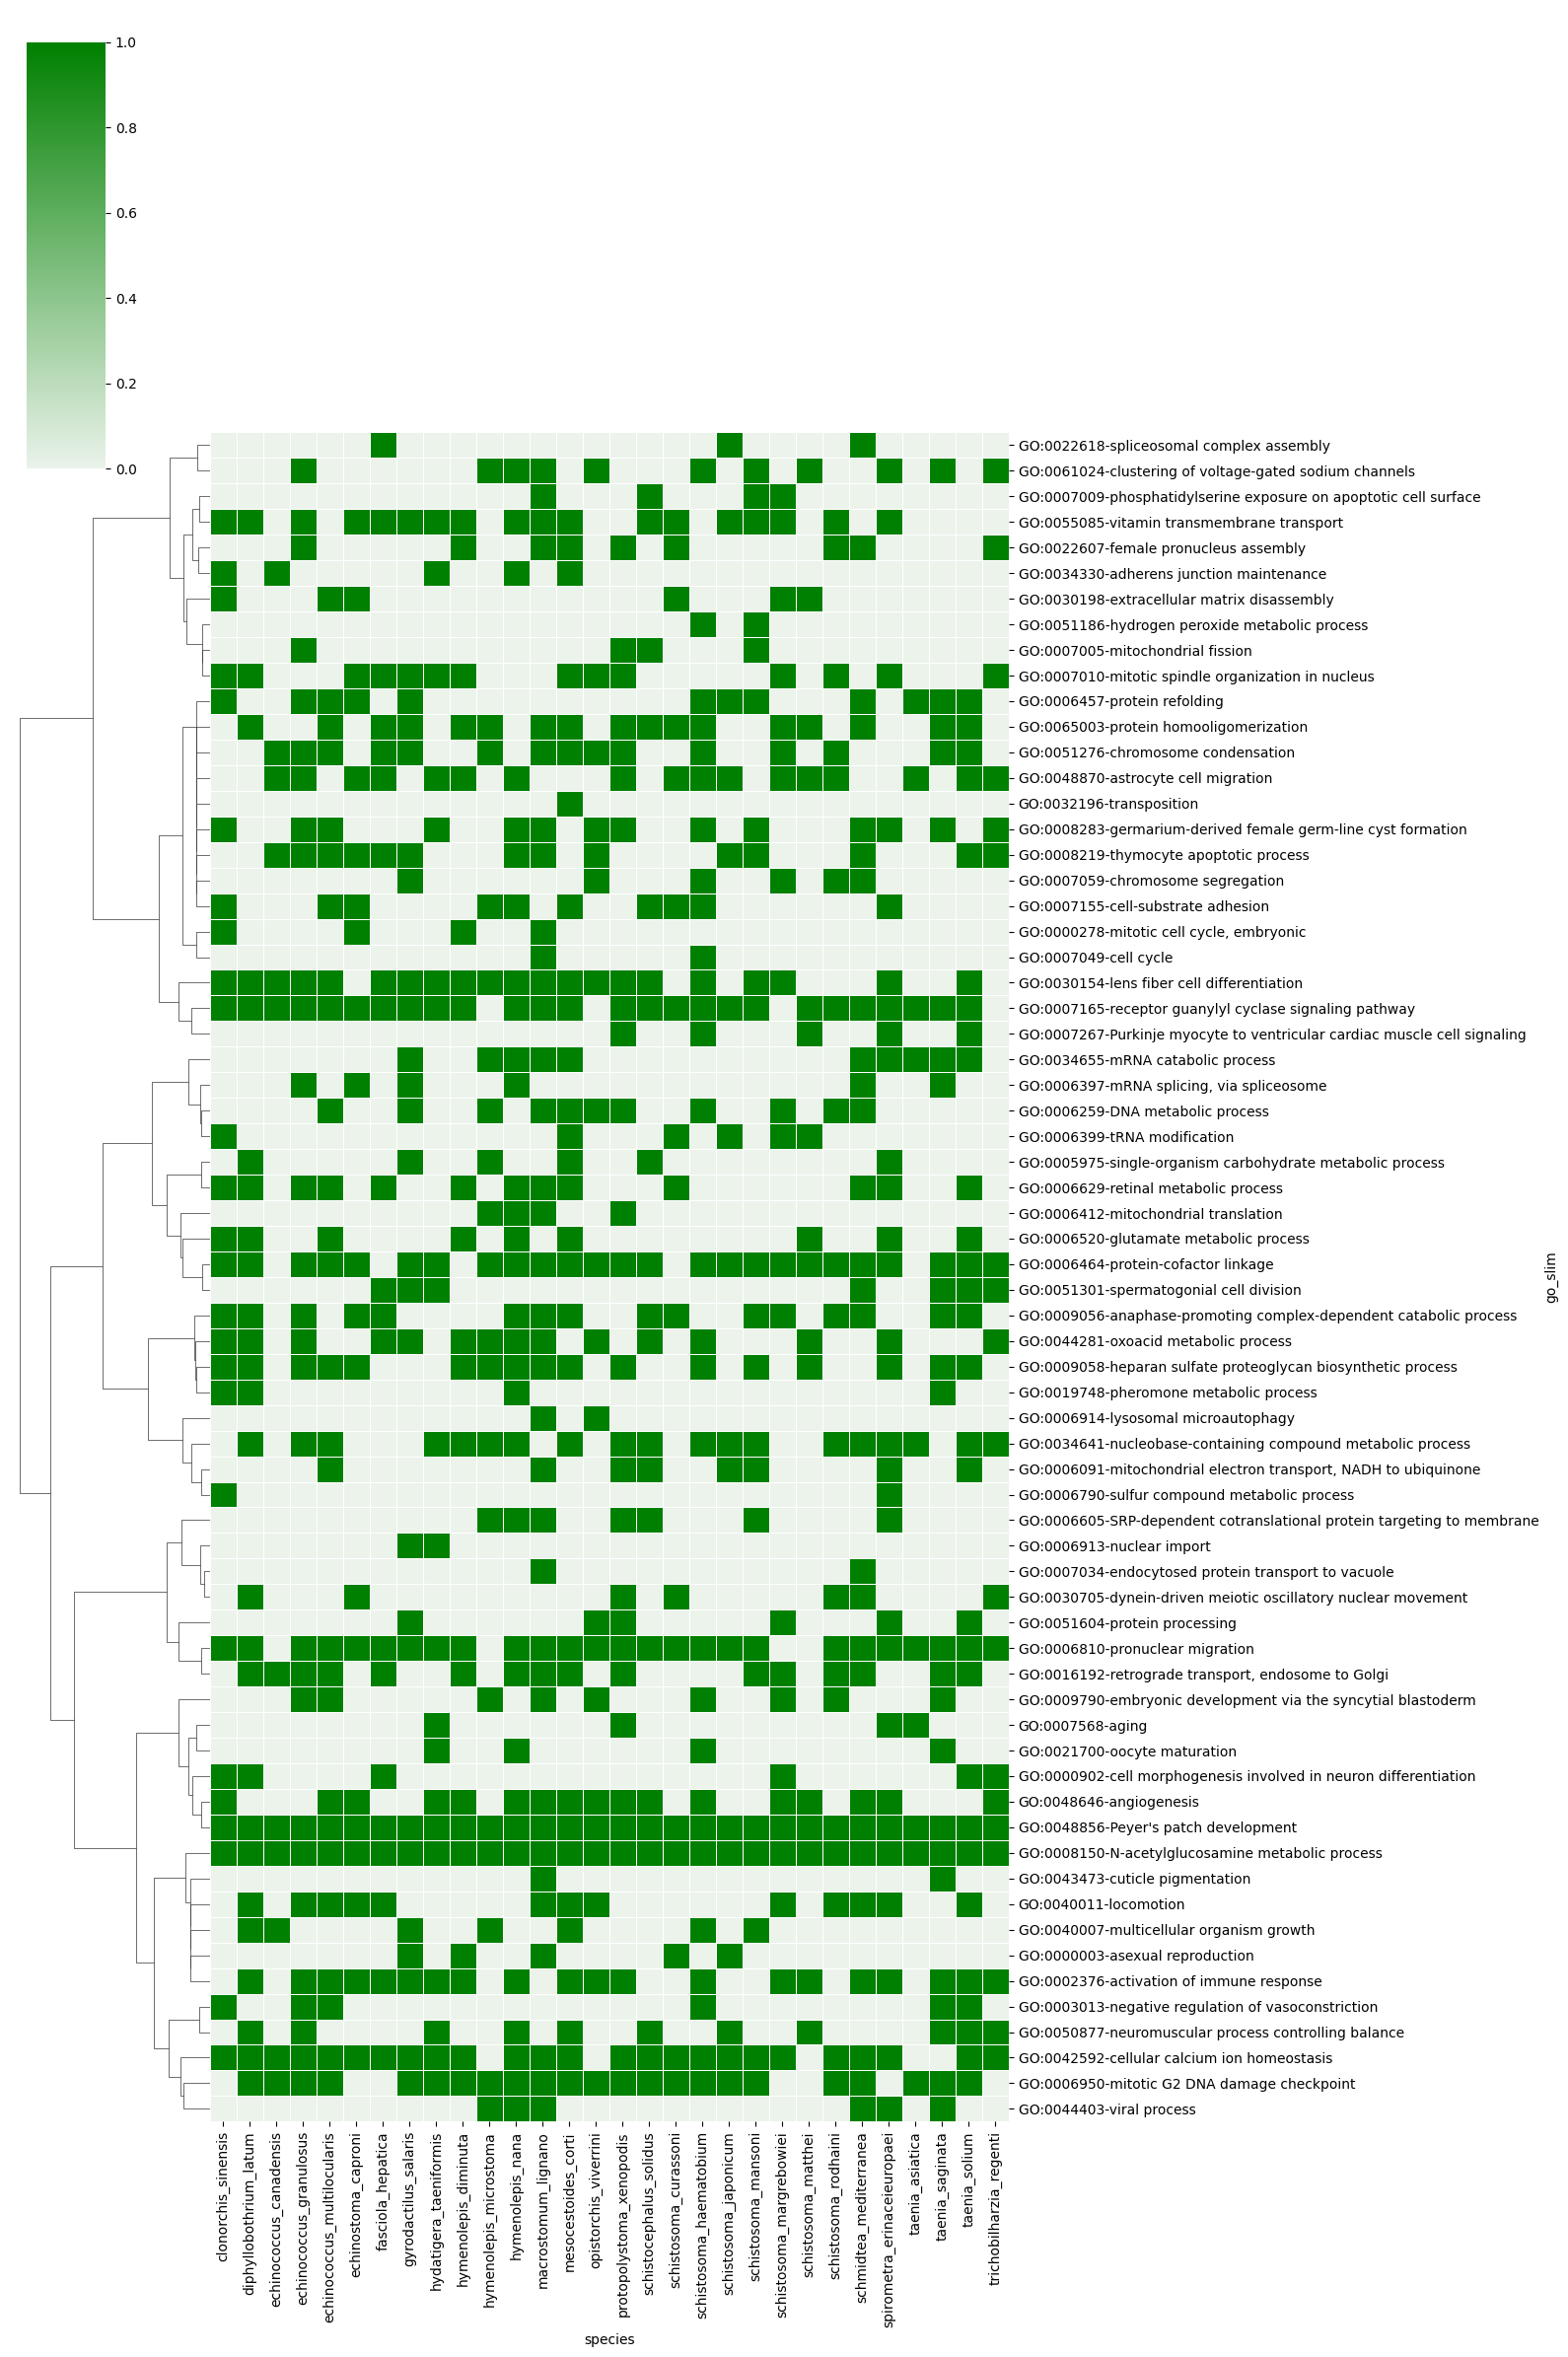

In [31]:
gBP = plotting_clustered_heatmap(go_slims_enriched_toplot = go_slims_enriched_toplot.query("`ONTOLOGY.x` == 'BP'"))

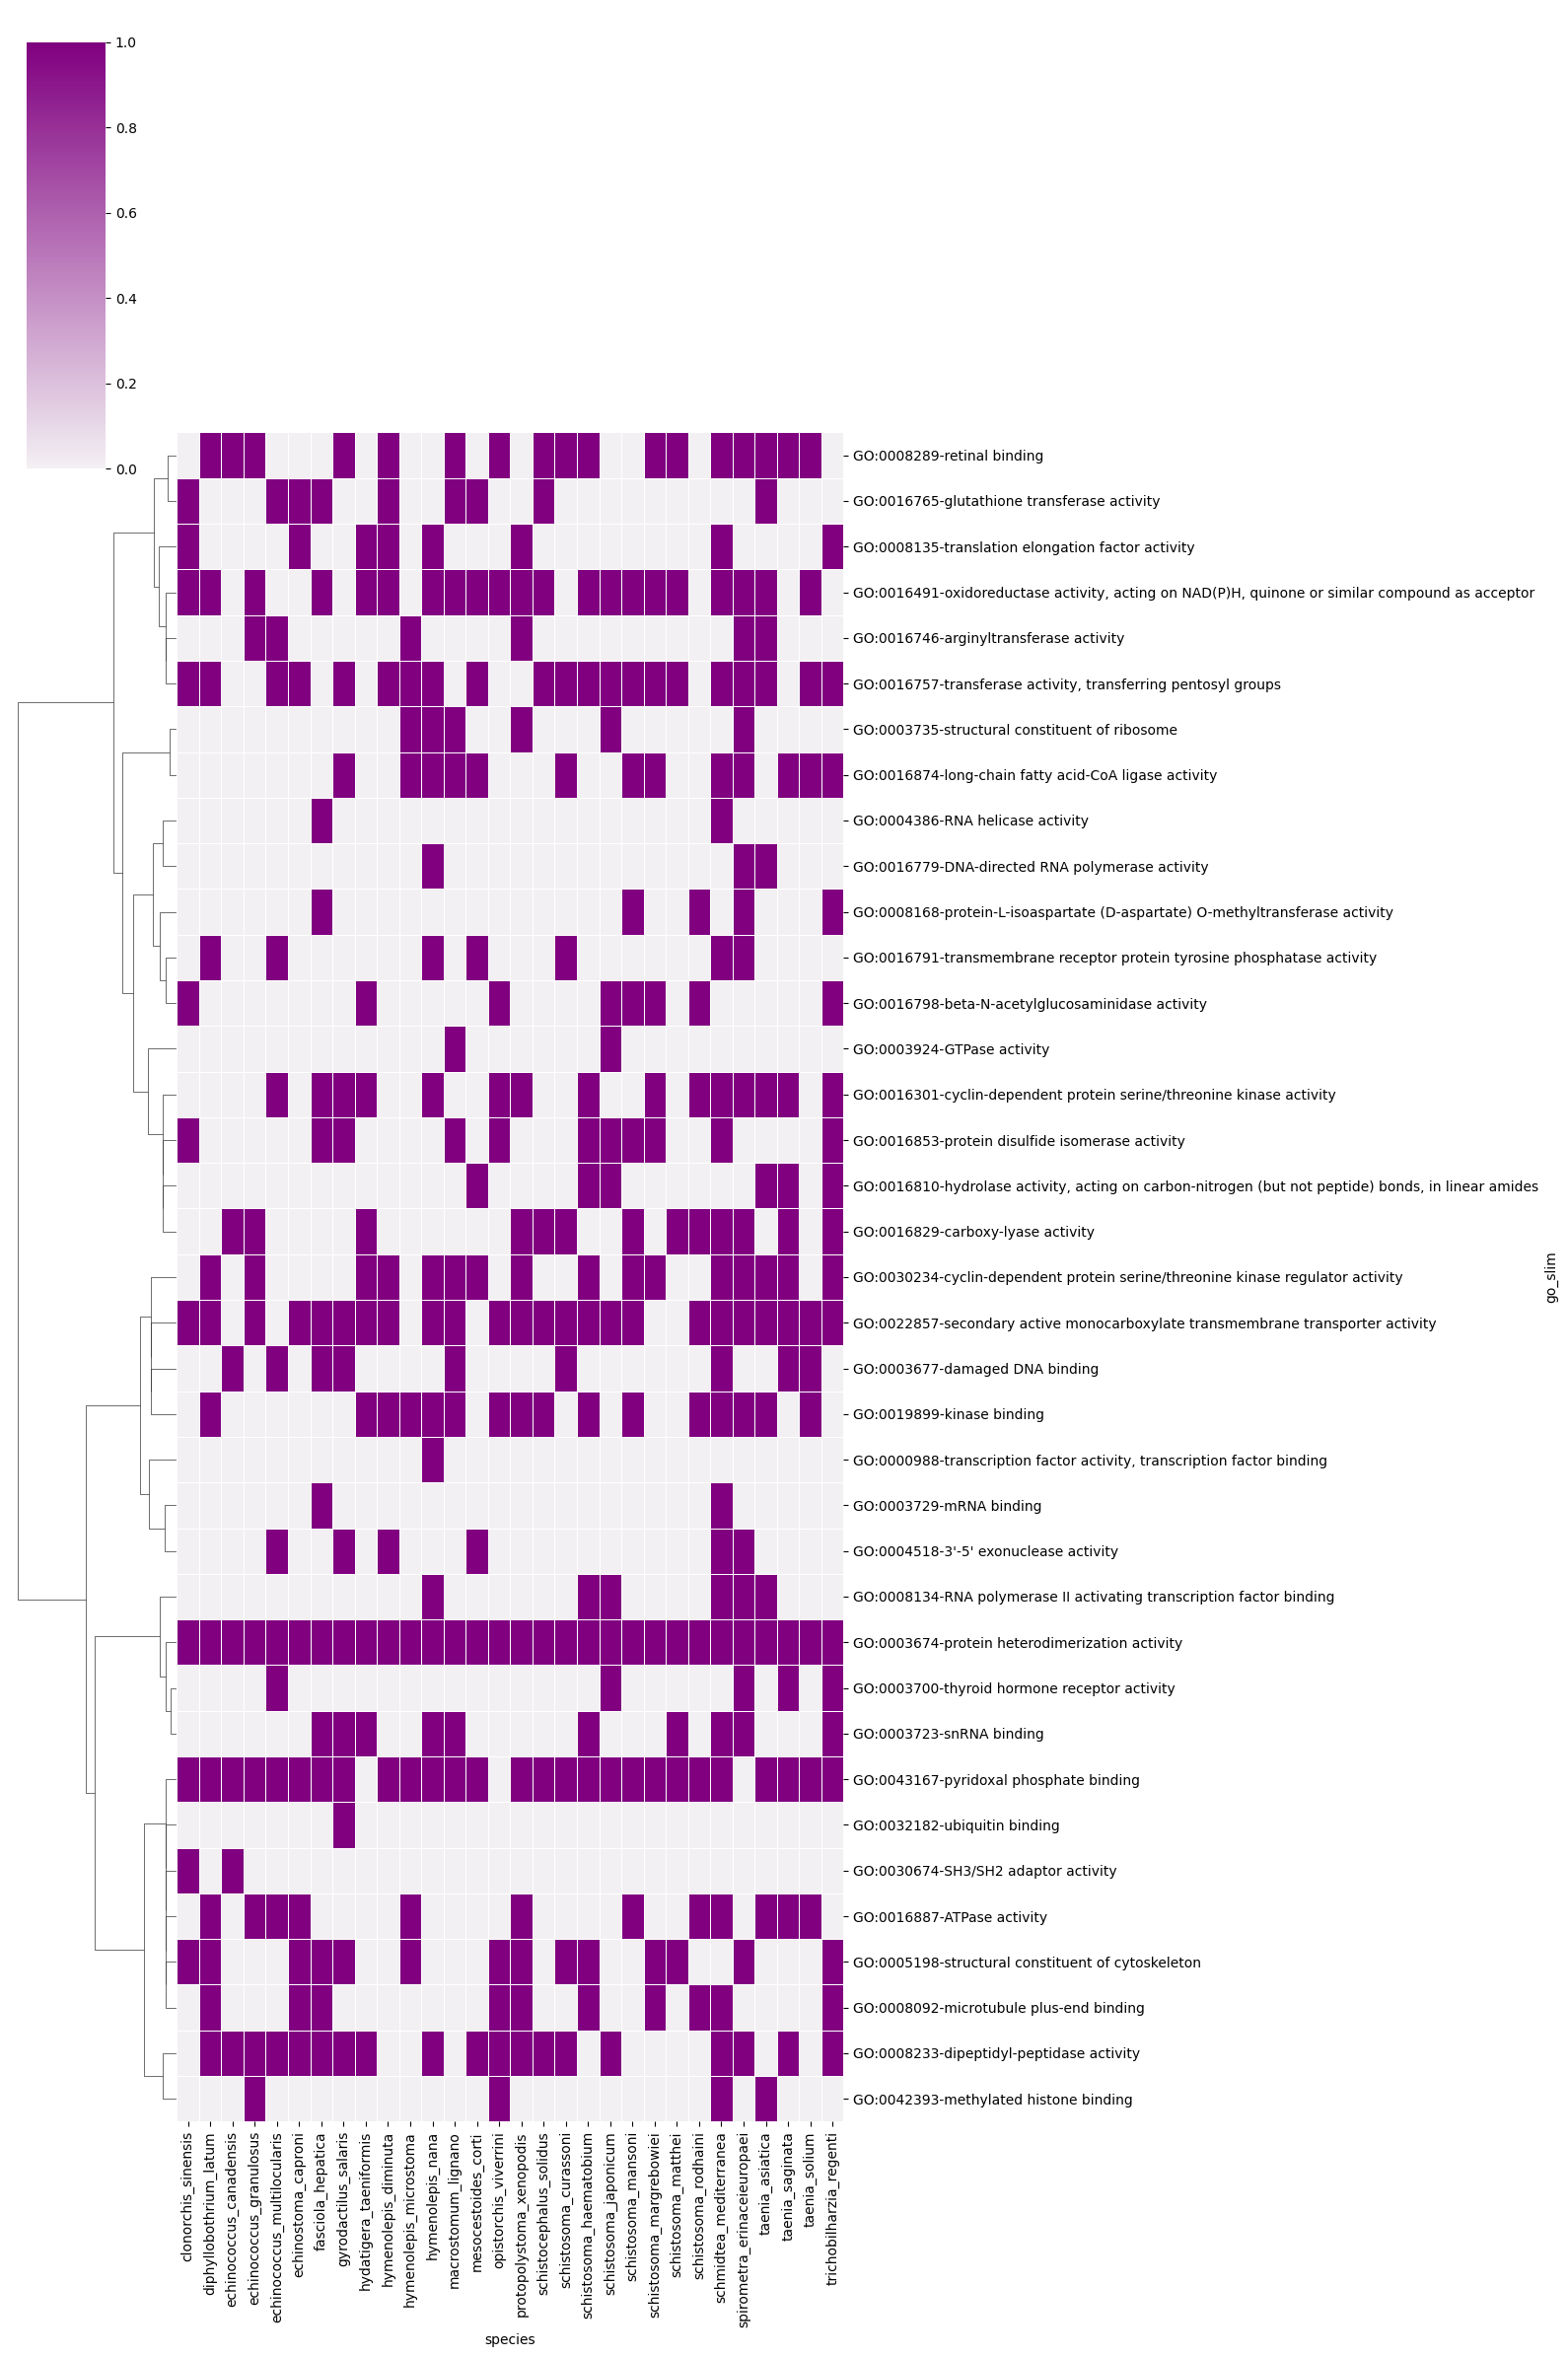

In [32]:
gMF = plotting_clustered_heatmap(go_slims_enriched_toplot.query("`ONTOLOGY.x` == 'MF'"))

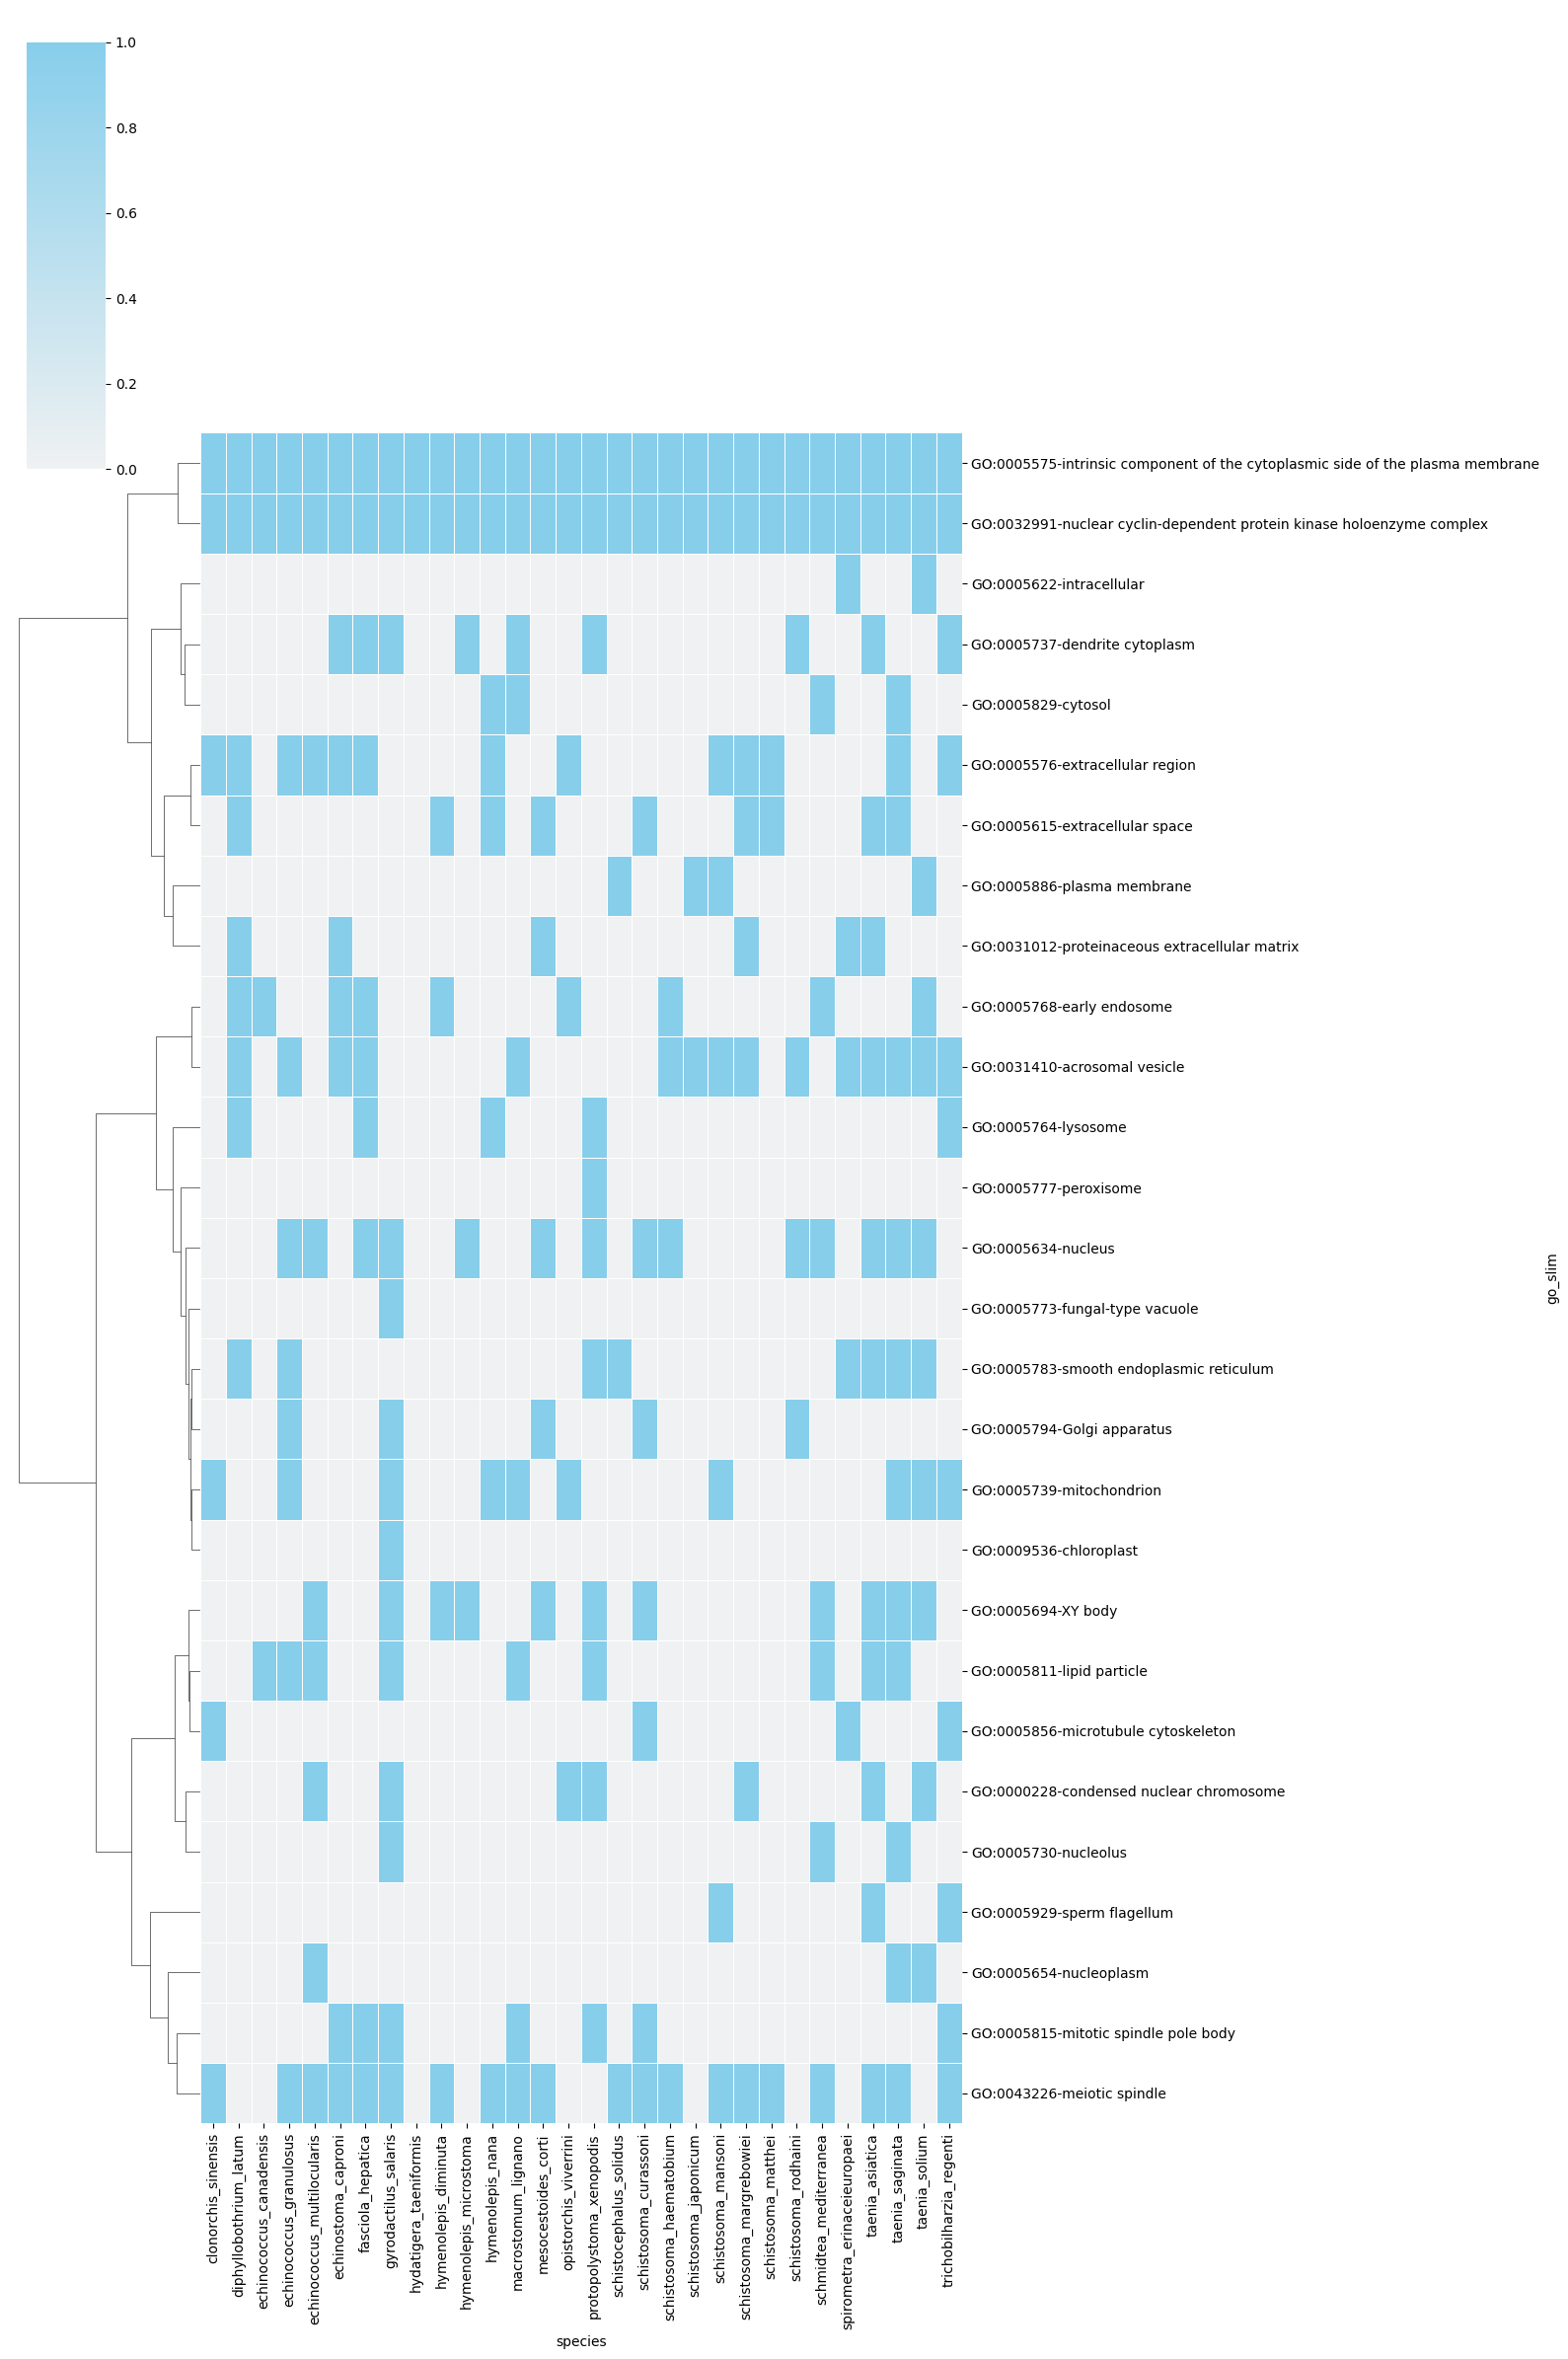

In [33]:
gCC = plotting_clustered_heatmap(go_slims_enriched_toplot.query("`ONTOLOGY.x` == 'CC'"))

**Creo que lo que tendría que hacer para emprolijar esto es lograr hacer tipo un facet para cada ontología...**

___

Ademas
- Cambiar los y-labels para {GO}-{Descripcion}

In [34]:
set([godag.get(x).depth for x in go_slims_enriched['go_slim'].to_list() if x in godag.keys()])

{0, 1, 2, 3, 4, 5, 6, 7, 8}

**Conclusion**: parece estar bastante restringido esto..., lo único que podría ver de cambiar acá sería levantar los datos, filtrarlos yo y ahí si ver si agrupa un toque más...

In [ ]:
#godag

### Restrict to levels xxxxx
Each term is restricted to its ancestral-level xxxx

___
Oteo un poco como viene la mano a nivel seis, por ejemplo...
___

In [109]:
import numpy as np
from goatools.godag.go_tasks import get_go2parents
from goatools.gosubdag.gosubdag import GoSubDag

In [96]:
# define auxiliary function
def get_parents(go_term):
    if go_term in godag.keys():
        return list(godag.get(go_term, {'parents': np.nan}).parents)

In [116]:
# defin function to normalize everything to level 6
def homogeneize_level(go_term, level):
    try:
        # get parents
        if go_term in godag.keys():
            if godag.get(go_term).level > level: # si el nivel no es por encima
                gosubdag_r0 = GoSubDag([GO_ID], godag, prt=None)
                list_of_parents = [go_id for go_id in gosubdag_r0.rcntobj.go2ancestors[go_term]]
                go_combo = [(godag.get(go_id).id, godag.get(go_id).name, godag.get(go_id).level) for 
                             go_id in list_of_parents if
                             godag.get(go_id).level == level]
                return go_combo
            elif godag.get(go_term).level == level:
                # si es exactamente el nivel
                return [(go_term,(godag.get(go_term).id, godag.get(go_term).name,godag.get(go_term).level))]
            else:
                # si estamos en cualquier otro caso 
                pass
        else:
            pass
    except:
        pass

In [117]:
homogeneize_level('GO:0034660', 4)

[('GO:0090304', 'nucleic acid metabolic process', 4)]

In [122]:
homogeneized_values = [homogeneize_level(x, level = 6) for x in go_slims_enriched['V1'].to_list() if 
  not homogeneize_level(x, level = 6) is None and len(homogeneize_level(x, level = 6) ) > 0]

In [127]:
import tqdm

In [129]:
# now getting this into a table
homogenized_rows = []
for packs in tqdm.tqdm(homogeneized_values):
    if len(packs) > 1:
        for pack in packs:
            homogenized_rows.append(pd.DataFrame.from_dict({'V1': [pack[0]], 
                                                       'parent_lvl_6_id': [pack[1][0]], 
                                                       'parent_lvl_6_name': [pack[1][1]]}))
    elif len(packs) == 1:
        homogenized_rows.append(pd.DataFrame.from_dict({'V1': [packs[0][0]], 
                                                       'parent_lvl_6_id': [packs[0][1][0]], 
                                                       'parent_lvl_6_name': [packs[0][1][1]]}))
homogenized_table = pd.concat(homogenized_rows)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 726/726 [00:00<00:00, 6375.20it/s]


In [130]:
homogenized_table

,V1,parent_lvl_6_id,parent_lvl_6_name
0,GO:0006584,GO:0006584,catecholamine metabolic process
0,GO:0006027,GO:0006027,glycosaminoglycan catabolic process
0,GO:0016254,GO:0016254,preassembly of GPI anchor in ER membrane
0,GO:0015721,GO:0015721,bile acid and bile salt transport
0,GO:0071711,GO:0071711,basement membrane organization
...,...,...,...
0,GO:0022839,GO:0022839,ion gated channel activity
0,GO:0016308,GO:0016308,1-phosphatidylinositol-4-phosphate 5-kinase ac...
0,GO:0008240,GO:0008240,tripeptidyl-peptidase activity
0,GO:0004867,GO:0004867,serine-type endopeptidase inhibitor activity


In [133]:
go_slims_enriched_homogeneized = go_slims_enriched.merge(homogenized_table, on = 'V1', how = 'left')

In [136]:
go_slims_enriched_homogeneized = go_slims_enriched_homogeneized.query("not `parent_lvl_6_id`.isnull()")

In [ ]:
# merging both tables

In [ ]:
go_slims_enriched_homogeneized

In [138]:
go_slims_enriched_homogeneized.head()

,go_slim,V1,p_value,species,TERM.x,ONTOLOGY.x,TERM.y,ONTOLOGY.y,parent_lvl_6_id,parent_lvl_6_name
12,GO:0008150,GO:0006584,0.00265,clonorchis_sinensis,catecholamine metabolic process,BP,biological_process,BP,GO:0006584,catecholamine metabolic process
16,GO:0009056,GO:0006027,0.00396,clonorchis_sinensis,glycosaminoglycan catabolic process,BP,catabolic process,BP,GO:0006027,glycosaminoglycan catabolic process
17,GO:0009056,GO:0006027,0.00396,clonorchis_sinensis,glycosaminoglycan catabolic process,BP,catabolic process,BP,GO:0006027,glycosaminoglycan catabolic process
19,GO:0006629,GO:0016254,0.00574,clonorchis_sinensis,preassembly of GPI anchor in ER membrane,BP,lipid metabolic process,BP,GO:0016254,preassembly of GPI anchor in ER membrane
20,GO:0006810,GO:0015721,0.00574,clonorchis_sinensis,bile acid and bile salt transport,BP,transport,BP,GO:0015721,bile acid and bile salt transport


In [140]:
go_slims_enriched_homogeneized_toplot = (go_slims_enriched_homogeneized[['V1', 'species', 'p_value', 'parent_lvl_6_name', 'ONTOLOGY.x']].
    rename({'V1': 'go_slim', 'parent_lvl_6_name': 'TERM.x'}, axis = 1).
    assign(p_value = lambda df: [adjusting_cells(x) for x in df['p_value'].to_list()]).
    pivot_table(index = ['ONTOLOGY.x', 'species'],
                columns='go_slim', values = 'p_value', aggfunc=np.sum, fill_value=0).
    applymap(converting_to_binary))

In [142]:
go_slims_enriched_homogeneized_toplot

go_slim                                 GO:0000045  GO:0000076  GO:0000266  \
ONTOLOGY.x species                                                           
BP         clonorchis_sinensis                   0           0           0   
           diphyllobothrium_latum                0           0           0   
           echinococcus_canadensis               0           0           0   
           echinococcus_granulosus               0           0           0   
           echinococcus_multilocularis           0           1           0   
...                                            ...         ...         ...   
MF         spirometra_erinaceieuropaei           0           0           0   
           taenia_asiatica                       0           0           0   
           taenia_saginata                       0           0           0   
           taenia_solium                         0           0           0   
           trichobilharzia_regenti               0           0           0   

go_slim                                 GO:0000328  GO:0000340  GO:0000741  \
ONTOLOGY.x species                                                           
BP         clonorchis_sinensis                   0           0           0   
           diphyllobothrium_latum                0           0           0   
           echinococcus_canadensis               0           0           0   
           echinococcus_granulosus               0           0           0   
           echinococcus_multilocularis           0           0           0   
...                                            ...         ...         ...   
MF         spirometra_erinaceieuropaei           0           0           0   
           taenia_asiatica                       0           0           0   
           taenia_saginata                       0           0           0   
           taenia_solium                         0           0           0   
           trichobilharzia_regenti               0           0           0   

go_slim                                 GO:0000749  GO:0000803  GO:0000959  \
ONTOLOGY.x species                                                           
BP         clonorchis_sinensis                   0           0           0   
           diphyllobothrium_latum                0           0           0   
           echinococcus_canadensis               0           0           0   
           echinococcus_granulosus               0           0           0   
           echinococcus_multilocularis           0           0           0   
...                                            ...         ...         ...   
MF         spirometra_erinaceieuropaei           0           0           0   
           taenia_asiatica                       0           0           0   
           taenia_saginata                       0           0           0   
           taenia_solium                         0           0           0   
           trichobilharzia_regenti               0           0           0   

go_slim                                 GO:0000977  ...  GO:1903725  \
ONTOLOGY.x species                                  ...               
BP         clonorchis_sinensis                   0  ...           0   
           diphyllobothrium_latum                0  ...           0   
           echinococcus_canadensis               0  ...           0   
           echinococcus_granulosus               0  ...           1   
           echinococcus_multilocularis           0  ...           0   
...                                            ...  ...         ...   
MF         spirometra_erinaceieuropaei           0  ...           0   
           taenia_asiatica                       0  ...           0   
           taenia_saginata                       0  ...           0   
           taenia_solium                         0  ...           0   
           trichobilharzia_regenti               0  ...           0   

go_slim                        

In [143]:
go_slims_enriched_homogeneized_toplot = go_slims_enriched_homogeneized_toplot.reset_index()

In [144]:
gMF = plotting_clustered_heatmap(go_slims_enriched_homogeneized_toplot.query("`ONTOLOGY.x` == 'MF'"))

KeyError: 'GO:0000340'

In [145]:
keys_to_lot = list(godag.keys())
go_slims_enriched_homogeneized_toplot.query()

go_slim,ONTOLOGY.x,species,GO:0000045,GO:0000076,GO:0000266,GO:0000328,GO:0000340,GO:0000741,GO:0000749,GO:0000803,...,GO:1903725,GO:1903727,GO:2000193,GO:2000378,GO:2000379,GO:2000645,GO:2000679,GO:2000737,GO:2001141,GO:2001258
0,BP,clonorchis_sinensis,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,BP,diphyllobothrium_latum,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BP,echinococcus_canadensis,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BP,echinococcus_granulosus,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,BP,echinococcus_multilocularis,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,MF,spirometra_erinaceieuropaei,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,MF,taenia_asiatica,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81,MF,taenia_saginata,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82,MF,taenia_solium,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='go_slim'>

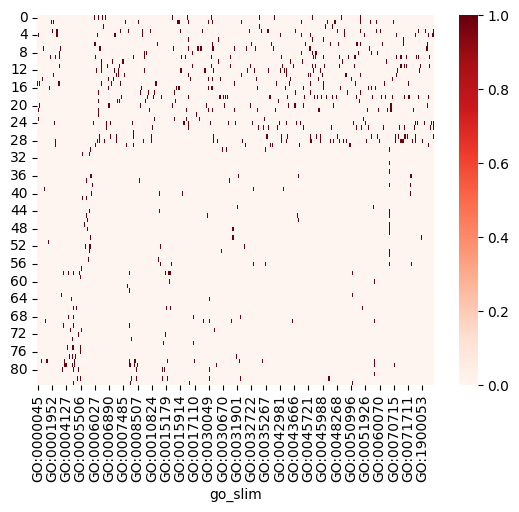

In [153]:
sns.heatmap(go_slims_enriched_homogeneized_toplot.drop(['ONTOLOGY.x', 'species'], axis = 1), cmap = 'Reds')

___
que me esta faltando por ahora
- si el nivel esta por encima del nivel deseado, no se considera
- si no llegue al nivel deseado, seguir por los padres hasta llegar
___

In [44]:
apa = [homogeneize_level(x) for x in go_slims_enriched['go_slim'].to_list() if x in godag.keys()]

In [70]:
list(godag.get(go_slims_enriched['go_slim'].to_list()[0]).parents)

[GOTerm('GO:0044237'):
   id:GO:0044237
   item_id:GO:0044237
   name:cellular metabolic process
   namespace:biological_process
   _parents: 2 items
     GO:0008152
     GO:0009987
   parents: 2 items
     GO:0009987	level-01	depth-01	cellular process [biological_process]
     GO:0008152	level-01	depth-01	metabolic process [biological_process]
   children: 43 items
   level:2
   depth:2
   is_obsolete:False
   alt_ids: 0 items
   relationship: 0 items
   relationship_rev: 3 items
     regulates: 1 items
       GO:0031323	level-04	depth-04	regulation of cellular metabolic process [biological_process]
     negatively_regulates: 1 items
       GO:0031324	level-05	depth-05	negative regulation of cellular metabolic process [biological_process]
     positively_regulates: 1 items
       GO:0031325	level-05	depth-05	positive regulation of cellular metabolic process [biological_process]]

In [65]:
[(y.id, y.level) for x in list([go_list for go_list in apa]) for y in list(x)]

[('GO:0044237', 2),
 ('GO:0009987', 1),
 ('GO:0050794', 3),
 ('GO:0032502', 1),
 ('GO:0044238', 2),
 ('GO:0071704', 2),
 ('GO:0032502', 1),
 ('GO:0065008', 2),
 ('GO:0032502', 1),
 ('GO:0009987', 1),
 ('GO:0007049', 2),
 ('GO:0044238', 2),
 ('GO:0071704', 2),
 ('GO:0009987', 1),
 ('GO:0006810', 3),
 ('GO:0044238', 2),
 ('GO:0019752', 5),
 ('GO:1901564', 3),
 ('GO:0051234', 2),
 ('GO:0008152', 1),
 ('GO:0009987', 1),
 ('GO:0006810', 3),
 ('GO:0044238', 2),
 ('GO:0071704', 2),
 ('GO:0051234', 2),
 ('GO:0045229', 4),
 ('GO:0043062', 4),
 ('GO:0009987', 1),
 ('GO:0006810', 3),
 ('GO:0051234', 2),
 ('GO:0065008', 2),
 ('GO:0009987', 1),
 ('GO:0008152', 1),
 ('GO:0009987', 1),
 ('GO:0006810', 3),
 ('GO:0009987', 1),
 ('GO:0008152', 1),
 ('GO:0019538', 3),
 ('GO:0043412', 4),
 ('GO:0045229', 4),
 ('GO:0043062', 4),
 ('GO:0006996', 4),
 ('GO:0032502', 1),
 ('GO:0051234', 2),
 ('GO:0051234', 2),
 ('GO:0051234', 2),
 ('GO:0051234', 2),
 ('GO:0003008', 2),
 ('GO:0016043', 3),
 ('GO:0065008', 2),


In [38]:
[godag.get(x).parents for x in go_slims_enriched['go_slim'].to_list() if x in godag.keys()]

[{GOTerm('GO:0044237'):
    id:GO:0044237
    item_id:GO:0044237
    name:cellular metabolic process
    namespace:biological_process
    _parents: 2 items
      GO:0008152
      GO:0009987
    parents: 2 items
      GO:0009987	level-01	depth-01	cellular process [biological_process]
      GO:0008152	level-01	depth-01	metabolic process [biological_process]
    children: 43 items
    level:2
    depth:2
    is_obsolete:False
    alt_ids: 0 items
    relationship: 0 items
    relationship_rev: 3 items
      regulates: 1 items
        GO:0031323	level-04	depth-04	regulation of cellular metabolic process [biological_process]
      negatively_regulates: 1 items
        GO:0031324	level-05	depth-05	negative regulation of cellular metabolic process [biological_process]
      positively_regulates: 1 items
        GO:0031325	level-05	depth-05	positive regulation of cellular metabolic process [biological_process]},
 {GOTerm('GO:0009987'):
    id:GO:0009987
    item_id:GO:0009987
    name:cellular

# Plotting results